### 4. Take a grayscale image of size 512x512, add some Gaussian noise, and perform the following operations in the frequency domain:

        (c) Perform edge detection on the noisy and clean image using ideal and Gaussian high pass filters.

In [33]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

### Add Gaussian Noise

In [34]:
# Mean (“centre”) of the distribution.
# Standard deviation (spread or “width”) of the distribution.

def add_gaussian_noise(image, mean=0, sigma=90):

    noise = np.random.normal(mean, sigma, image.shape)
    noisy_image = np.clip(image + noise, 0, 255)

    return noisy_image.astype(np.uint8)

### DFT

In [35]:
def applyDFT(image):

    fftImage = np.fft.fftshift(np.fft.fft2(image))

    return fftImage

### IDFT

In [36]:
def applyIDFT(image):

    idftImage = np.fft.ifft2(np.fft.ifftshift(image)).real

    return idftImage

### Ideal HighPass Filter

In [37]:
def applyIdealHighPassFilter(image, cutOffFrequency):

    height, width = image.shape
    idealFilter = np.zeros(image.shape, dtype=np.float32)

    for u in range(height):
        for v in range(width):
            D = np.sqrt((u - height/2)**2 + (v - width/2)**2)
            if (D > cutOffFrequency):
                idealFilter[u, v] = 1

    filteredImage = image * idealFilter
    
    return filteredImage

### Gaussian HighPass Filter

In [38]:
def applyGaussianHighPassFilter(image, D0):     # D0 is the cut-off frequency

    height, width = image.shape
    gaussianFilter = np.zeros(image.shape, dtype=np.float32)

    for u in range(height):
        for v in range(width):
            D = np.sqrt((u - height/2)**2 + (v - width/2)**2)
            gaussianFilter[u, v] = 1 - np.exp(-(D**2) / (2 * (D0**2)))

    filteredImage = image * gaussianFilter

    return filteredImage

In [39]:
originalImage = cv2.imread("img5.tif", cv2.IMREAD_GRAYSCALE)

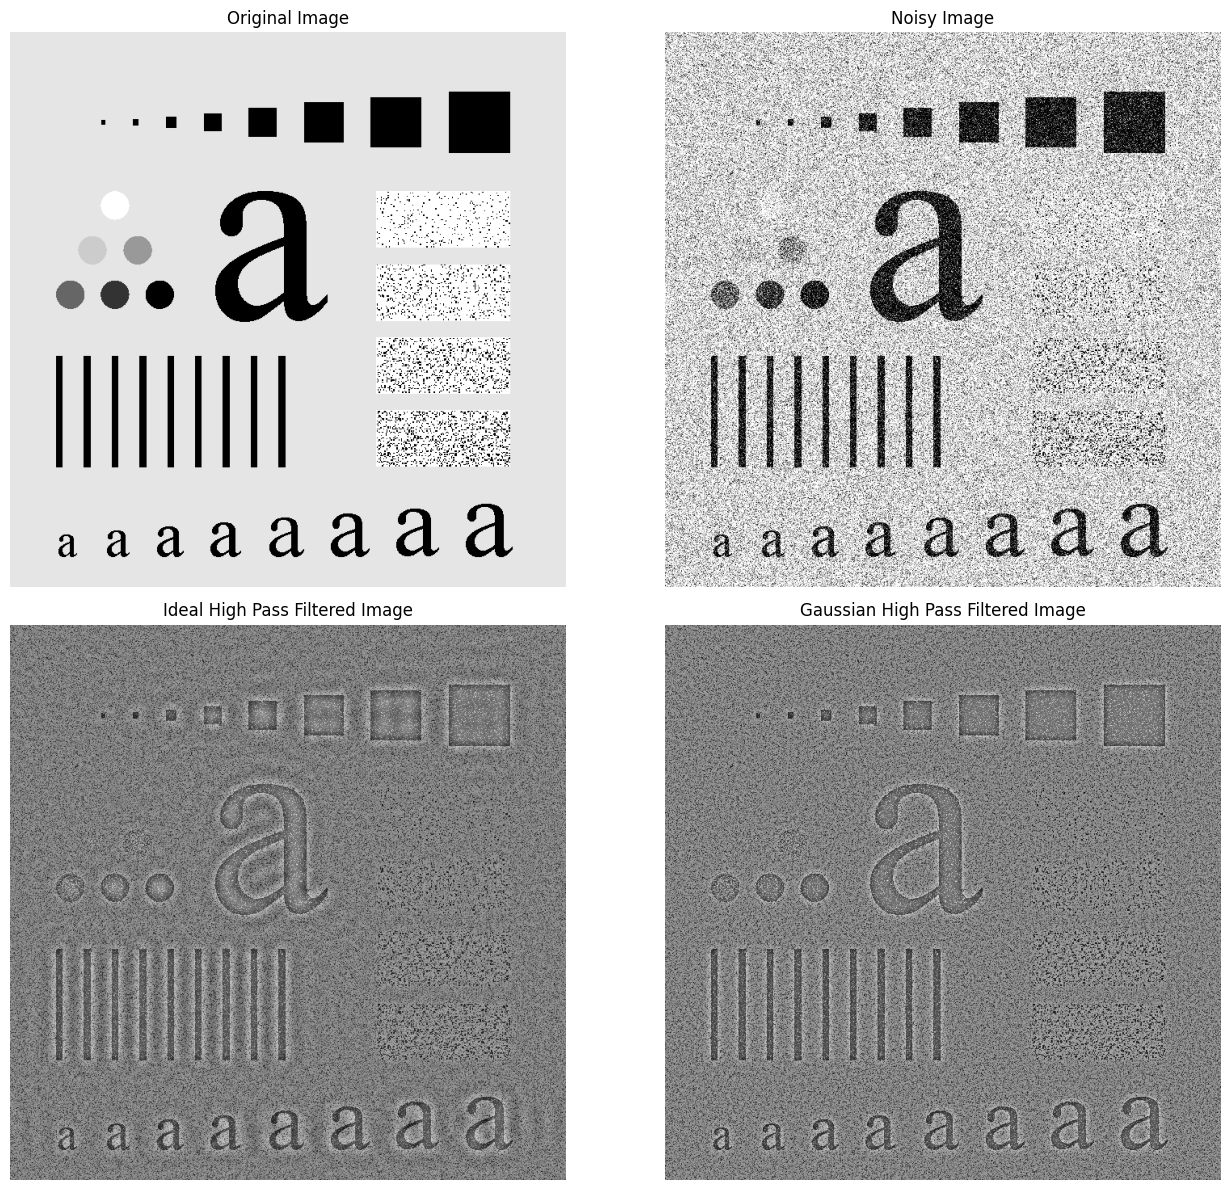

In [40]:
plt.figure(figsize=(16, 12))


# Original Image
plt.subplot(2, 2, 1)
plt.imshow(originalImage, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.tight_layout()


# Adding Gaussian Noise
noisyImage = add_gaussian_noise(originalImage)
plt.subplot(2, 2, 2)
plt.imshow(noisyImage, cmap='gray')
plt.title("Noisy Image")
plt.axis('off')
plt.tight_layout()

# Applying DFT
dftImage = applyDFT(noisyImage)


# Ideal High Pass Filter
cutOffFrequency = 25
idealHighPassFilteredImage = applyIdealHighPassFilter(dftImage, cutOffFrequency)
idealHighPassFilteredImage = applyIDFT(idealHighPassFilteredImage)
plt.subplot(2, 2, 3)
plt.imshow(idealHighPassFilteredImage, cmap='gray')
plt.title("Ideal High Pass Filtered Image")
plt.axis('off')
plt.tight_layout()

# Gaussian High Pass Filter
D0 = 25
gaussianHighPassFilteredImage = applyGaussianHighPassFilter(dftImage, D0)
gaussianHighPassFilteredImage = applyIDFT(gaussianHighPassFilteredImage)
plt.subplot(2, 2, 4)
plt.imshow(gaussianHighPassFilteredImage, cmap='gray')
plt.title("Gaussian High Pass Filtered Image")
plt.axis('off')
plt.tight_layout()